# TensorFlow 2.0

## Installation

Install tensorflow from anaconda prompt/ virtual environment (should be pre-installed for now)

### CPU Version:

>`pip install tensorflow`

### For Nvidia GPU users:

>`pip install tensorflow-gpu` 

Import Tensorflow library and ensure you've the version 2 installed

In [1]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [2]:
from tensorflow import keras
keras.__version__

'2.2.4-tf'

### For tensorflow-gpu only:

Allocate python to GPU

In [3]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## Other required libraries:

>`pip install matplotlib`

>`pip install numpy`

## MNIST (Hand Written Digit Images):

Now that we've everything ready, let's get a dataset!

MNIST is a dataset of 70000 images of hand-written digits

It is considered as the __"Hello World!__" for Machine Learning

In [4]:
mnist = keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data to have values between 0 to 1
X_train, X_test = X_train/255.0, X_test/255.0

We check how our data looks

In [5]:
X_train.shape, X_train[0]

((60000, 28, 28),
 array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.   

So it's a _28x28_ array for every single data

The values represent the pixel intensity at every point, but it's too complex to understand what it means. 

Let's visualize it!

## Matplotlib:

Matplotlib is a library (based on matlab) used for plotting data points in python.

_To get a quick idea on the data, let's check how it looks!_

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

We can fairly say it is a number "5" and we can easily detect it.

Let's see what do we have in our labels (outputs) and cross check for the figure

In [7]:
set(y_test)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

So, we are now sure that the given image is 5.

Now it's time we create a model that can detect it too!

## Keras:

Keras is a high-level API designed on top of tensorflow that provides a flexible approach to nueral networks

In [8]:
cnn = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

_Whoa whoa whoa, that's a lot happening over here!_

Let's check them one by one:

### CNN Model

   **seq = keras.models.Sequential:** Initializes a Sequential model

   **keras.layers.Conv2D:** Adds a convolutinal layer

   **keras.layers.MaxPooling2D((2,2)):** Converts 2x2 pixel block into a single pixel by taking max from them

   **keras.layers.Flatten(input_shape = (28,28)):** Adds a layer that converts (flattens) 28x28 array to 784 values
   
   **keras.layers.Dense(128, activation = 'relu'):** Adds another layer of 128 nodes using activation of relu
       
   **keras.layers.Dense(128, activaiton = 'relu'):** Another layer of 128 nodes

   **keras.layers.Dense(10, activation = 'softmax'):** Final output layer with strength of each class for a given input


### Relu (Rectified Linear Unit): 

Relu is an actication function and can be defined as:

>f(x) = x, x > 0

>f(x) = 0, x <= 0

### Model Compile:

Configuration parameters(settings) for the model

**optimizer:** Defines which method to use for finding best solution

**loss:** The function to use for measurement of error

**metrics:** Defines the parameter on which the model is to be improved

In [9]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

However, we can't directly plug in the current data as CNN requires a 4-D data

To convert our 3d data (60000, 28, 28), we add in an extra dimension using numpy function `reshape`

In [10]:
X_train_cnn = X_train.reshape((60000, 28, 28, 1))
X_test_cnn = X_test.reshape((10000, 28, 28, 1))

Now that we created the model structure and have the data ready, it's time to run it!

In [11]:
hist_cnn = cnn.fit(X_train_cnn, y_train, epochs = 5,
       validation_data = (X_test_cnn, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 15s 255us/sample - loss: 0.1422 - accuracy: 0.9553 - val_loss: 0.0396 - val_accuracy: 0.9867
Epoch 2/5
60000/60000 [==============================] - 13s 211us/sample - loss: 0.0472 - accuracy: 0.9857 - val_loss: 0.0422 - val_accuracy: 0.9858
Epoch 3/5
60000/60000 [==============================] - 14s 225us/sample - loss: 0.0342 - accuracy: 0.9894 - val_loss: 0.0262 - val_accuracy: 0.9911
Epoch 4/5
60000/60000 [==============================] - 16s 271us/sample - loss: 0.0264 - accuracy: 0.9918 - val_loss: 0.0301 - val_accuracy: 0.9905
Epoch 5/5
60000/60000 [==============================] - 16s 270us/sample - loss: 0.0210 - accuracy: 0.9932 - val_loss: 0.0300 - val_accuracy: 0.9907


In [12]:
cnn_preds = cnn.predict(X_test_cnn)
import numpy as np

Original Digit: 0; Predicted Output: 0 


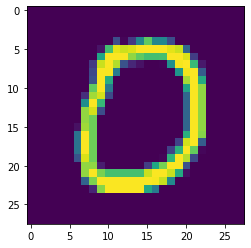

In [13]:
INDEX = 10         # Enter an index between 0-9999
plt.imshow(X_test[INDEX])

print("Original Digit: {}; Predicted Output: {} ".format(y_test[INDEX], np.argmax(cnn_preds[INDEX])))

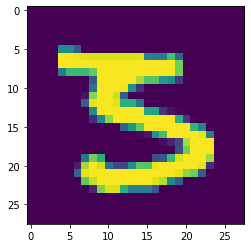

In [14]:
plt.imshow(X_test[449])

In [15]:
list_of_wrong_preds = []
for i, (real, pred) in enumerate(zip(y_test, cnn_preds)):
    if real != np.argmax(pred):
        list_of_wrong_preds.append(i)
        
print(list_of_wrong_preds)

[321, 324, 445, 449, 450, 551, 582, 583, 659, 716, 740, 882, 938, 947, 1014, 1039, 1181, 1232, 1247, 1260, 1299, 1364, 1569, 1681, 1709, 1737, 1782, 1790, 1878, 1901, 2018, 2035, 2118, 2130, 2135, 2182, 2293, 2308, 2329, 2369, 2447, 2488, 2597, 2654, 2770, 2771, 2896, 2939, 2953, 3251, 3289, 3422, 3451, 3520, 3534, 3574, 3727, 3762, 3808, 3906, 4027, 4176, 4443, 4504, 4571, 4620, 4639, 4699, 4740, 4761, 4838, 5165, 5756, 5955, 6555, 6571, 6576, 6597, 6625, 6651, 6796, 7249, 8326, 8527, 9634, 9638, 9642, 9664, 9679, 9698, 9729, 9792, 9839]


In [17]:
cnn.save("../Models/mnist.h5")

In [19]:
model = tf.keras.models.load_model("../Models/mnist.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [20]:
import matplotlib.image as mpimg 

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

4

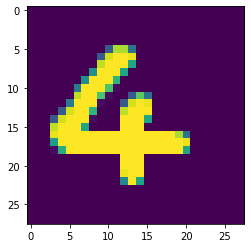

In [22]:
img = mpimg.imread('../flask_uploads/4.png')  
gray = rgb2gray(img)
plt.imshow(gray)

img = gray.reshape(1, 28, 28, 1)
np.argmax(cnn.predict([img]))